# Introduction to Machine Learning with California Housing Dataset

<center><img src="../images/stock/pexels-pixabay-247819 (1).jpg"></center>

This notebook provides an introductory lesson to Machine Learning (ML) using the California Housing dataset. 

We will cover fundamental concepts,
the typical ML workflow, and a practical example of building a regression model.


## What is Machine Learning?

Machine Learning is a subset of Artificial Intelligence (AI) that enables systems
to learn from data, identify patterns, and make decisions or predictions with
minimal human intervention. 

Instead of being explicitly programmed, ML models
"learn" from data.

## Types of Machine Learning

1.  **Supervised Learning:**
    * **Concept:** The model learns from labeled data, meaning the input data
        (features) is paired with the correct output (labels or targets).
    * **Goal:** To predict an output based on new, unseen input data.
    * **Examples:**
        * **Regression:** Predicting a continuous value (house prices, temperature, etc).
        * **Classification:** Predicting a categorical label (spam/not spam, dog/cat, etc).

2.  **Unsupervised Learning:**
    * **Concept:** The model learns from unlabeled data, finding hidden patterns
        or structures within the data without explicit guidance.
    * **Goal:** To discover underlying structures or representations in the data.
    * **Examples:**
        * **Clustering:** Grouping similar data points together (customer segmentation, etc).
        * **Dimensionality Reduction:** Reducing the number of features while retaining
            important information.

3.  **Reinforcement Learning:**
    * **Concept:** An agent learns to make decisions by performing actions in an
        environment and receiving rewards or penalties.
    * **Goal:** To maximize cumulative reward over time.
    * **Examples:** Game playing (AlphaGo), robotics, autonomous driving.


## The Machine Learning Workflow

The typical ML workflow involves several stages:

1.  **Problem Definition:** Clearly define what you want to achieve with ML.
2.  **Data Collection:** Gather relevant data.
3.  **Data Preprocessing/Cleaning:** Handle missing values, outliers, transform data,
    feature engineering. This is often the most time-consuming step.
4.  **Feature Selection/Engineering:** Choosing the most relevant features or creating new ones.
5.  **Model Selection:** Choosing an appropriate ML algorithm based on the problem type
    (e.g., Linear Regression for continuous prediction, Logistic Regression for classification).
6.  **Training:** Feeding the preprocessed data to the chosen model so it can learn patterns.
7.  **Evaluation:** Assessing the model's performance on unseen data using appropriate metrics.
8.  **Hyperparameter Tuning:** Optimizing model parameters that are not learned from data.
9.  **Deployment:** Integrating the trained model into an application or system.
10. **Monitoring & Maintenance:** Continuously monitoring the model's performance and retraining if necessary.


## Practical Example: Predicting California Housing Prices

In this example, we will use the California Housing dataset, a classic dataset for regression tasks. Our goal is to predict the median house value for districts in California based on various features.

### 1. Import Necessary Libraries

We will import 

* `numpy` for numerical operations
* `pandas` for data manipulation
* `matplotlib.pyplot` and `seaborn` for visualization
* `sklearn`for dataset loading, model training, and evaluation.

In [1]:
## Begin Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Set plot style for better aesthetics
sns.set_style("whitegrid")
## End Imports

### 2. Load the California Housing Dataset

The California Housing dataset is readily available in `scikit-learn`.

### 2. Load the California Housing Dataset

Many common datasets are already built into machine learning libraries, making them easy to access. The California Housing dataset is one of them, available through `scikit-learn`.

This dataset was derived from the 1990 U.S. census, using one row per census block group.

A block group is the smallest geographical unit for which the U.S.
Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

Each row of the dataset represents a single block group:
* __MedInc__:        median income in block group
* __HouseAge__:     median house age in block group
* __AveRooms__:      average number of rooms per household
* __AveBedrms__:     average number of bedrooms per household
* __Population__:    block group population
* __AveOccup__:     average number of household members
* __Latitude__:      block group latitude
* __Longitude__:     block group longitude

**In the cell below:**
* Load the dataset into a variable named `california_housing` using `fetch_california_housing(as_frame=True)`.
* Create `X` from `california_housing.data` (these are your features).
* Create `y` from `california_housing.target` (this is what you'll predict).
* Check the dimensions by printing the `.shape` of `X` and `y`.
* Get a quick look at your data by displaying the first few rows of `X` and `y` using `.head()`.

In [2]:
## Begin Example
california_housing = fetch_california_housing(as_frame=True)

# Features
X = california_housing.data 

# Target (median house value)
y = california_housing.target

## End Example

In [3]:
# X rows
X.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


In [4]:
# Y Rows
y.head(10)

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
5    2.697
6    2.992
7    2.414
8    2.267
9    2.611
Name: MedHouseVal, dtype: float64

### 3.1 Data Exploration: Getting to Know the Data

<center><img src="../images/stock/pexels-cottonbro-5473955.jpg"></center>


It's crucial to understand your data before trying to build a model. Let's start by looking at some basic numbers and visualizing distributions.

**In the cell below:**

* __Get Descriptive Statistics:__ Use the `.describe()` method on your features (`X`) to see a summary of their central tendency, dispersion, and shape.
* __Visualize All Distributions:__ Create histograms for all columns in your `california_housing.frame`. This will include both your features (like `MedInc`, `HouseAge`, etc.) and your target variable (`MedHouseVal`). You can use the built-in `.hist()` method available on pandas DataFrames, which works well with `matplotlib`.
* Consider adjusting the `figsize` and `bins` parameters to make the histograms clear and readable.
* Add `edgecolor="black"` for better visual separation of bars.
* Use `plt.subplots_adjust` to manage spacing between plots, and `plt.suptitle` for an overall title.
* Call `plt.tight_layout()` to prevent labels from overlapping.

**After running the code, what do you notice about the histograms?**

* Look at `MedInc` (Median Income) and `MedHouseVal` (Median House Value). Do you see a long "tail" on one side, or do they stop abruptly? (note that `MedHouseVal` was capped at $500,000 for simplicity in the original dataset, which means values above 5.0 are shown as 5.0).
* Which features seem to have a lot of data grouped together, and which are more spread out?
* Do any of them look like a bell curve? 

In [5]:
## Begin Example
# Descriptive Statistics


## End Example

In [6]:
# Descriptive Statistics
X.describe()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


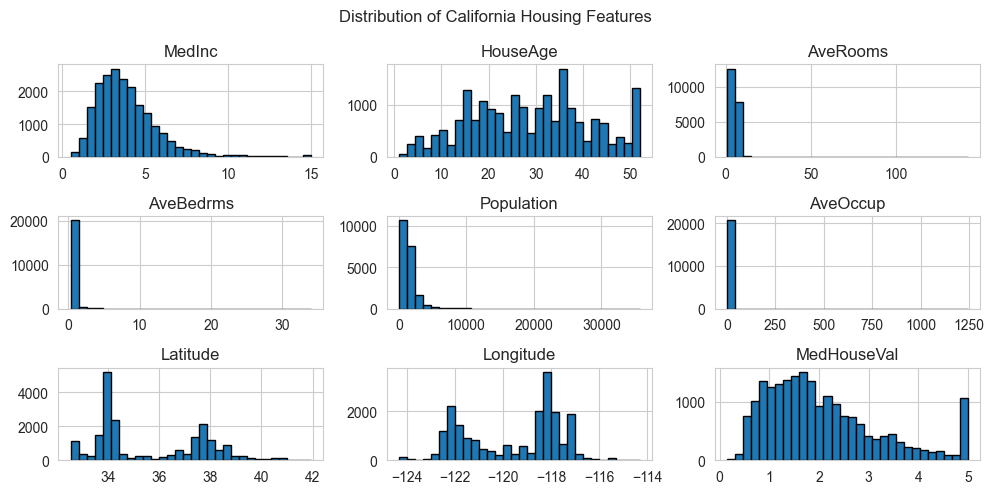

In [7]:
## Begin Example
## Viz
california_housing.frame.hist(figsize=(10,5), 
                              bins=30, 
                              edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)
plt.suptitle("Distribution of California Housing Features")
plt.tight_layout()
## End Example

### 3.2 Data Exploration: Geographical Distribution of House Values

Let's use a scatter plot to visualize house values on a map of California. This will help us see if there are any geographical patterns.

* The **horizontal position (x-axis)** of each dot tells us its **Longitude** (how far east or west it is).
* The **vertical position (y-axis)** of each dot tells us its **Latitude** (how far north or south it is).
* We can also use the **size** and **color** of each dot to show the **Median House Value (`MedHouseVal`)** of that neighborhood. Bigger and brighter dots will represent higher values.

**In the cell below:**

* __Generate the Scatter Plot:__
    * Use `sns.scatterplot()` to plot `Longitude` on the x-axis and `Latitude` on the y-axis.
    * Map `MedHouseVal` to both the `size` and `hue` (color) of the points.
    * Set `palette="viridis"` for a clear color gradient and `alpha=0.5` to help see overlapping points.
* __Adjust the Legend:__ Position the legend so it doesn't obstruct the data using `loc`.
* __Add a Title:__ Give your plot a descriptive title that reflects what it's showing.

**What do you notice about the plot?**
* Are there any bright, large clusters of dots? Where are they located?
* Do smaller, darker dots appear in different areas?
* What does this tell us about housing prices and location in California?

Text(0.5, 1.0, 'Median House Value Geographic Distribution')

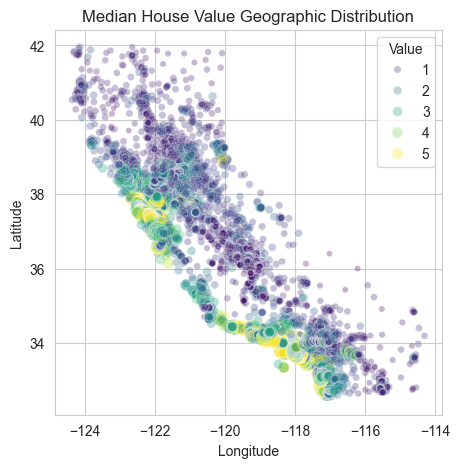

In [8]:
## Begin Example
plt.figure(figsize=(5,5))
sns.scatterplot(data=california_housing.frame,
                x="Longitude",
                y="Latitude",
                size="MedHouseVal",
                hue="MedHouseVal",
                palette="viridis",
                alpha=0.3)
plt.legend(title="Value", 
           loc="best")
plt.title("Median House Value Geographic Distribution")
## End Example

### 4. Splitting the Data into Training and Testing Sets

This is a critical step in Machine Learning! You need to split your data into two parts:
* The **Training Set:** This is the data your model will "learn" from.
* The **Testing Set:** This is data the model has **never seen before**. You'll use it to evaluate how well your model truly performs and if it can make good predictions on new, real-world data.

We typically use about 70-80% of the data for training and 20-30% for testing. Using `random_state` ensures that if you run your code multiple times, you'll get the same split, which helps with reproducibility.

**In the cell below:**

Use the `train_test_split` function from `sklearn.model_selection` to divide your `X` (features) and `y` (target) data. When calling the function:

* Set `test_size=0.2` to allocate 20% of the data for testing.
* Set `random_state=42` to ensure that if you run the code multiple times, you'll get the exact same split, which is great for reproducibility.

This function will return four separate items, so you'll need to create four variables to capture them:

* `X_train`: Your training features.
* `X_test`: Your testing features.
* `y_train`: Your training target values.
* `y_test`: Your testing target values.


Syntax Example:

```python
X_train, X_test, y_train, y_test = train_test_split(Your_X_Data,
                                                    Your_y_Data, 
                                                    test_size=float, 
                                                    random_state=int)
```

In [9]:
## Begin Example
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

print("Data Split Complete")
## End Example

Data Split Complete


In [10]:
print(X_train.shape)
print(y_train.shape)

(16512, 8)
(16512,)


### 5. Model Selection and Training

For this regression problem (predicting a continuous number), we'll start with a simple but powerful model: **Linear Regression**. This model tries to find the best straight line (or flat surface in multiple dimensions) that fits your data.

**In the cell below:**
* __Create an Instance:__ Create a new, empty model object by calling `LinearRegression()`. You'll typically assign this to a variable like `model`.
* __Train the Model:__ Now, use the `fit()` method on your `model` instance. Provide your training features (`X_train`) and your corresponding training target values (`y_train`) to this method. During this step, the model will analyze your training data and learn the underlying patterns and relationships.

Syntax Example:

```python
model = LinearRegression()
model.fit(Your_X_Train, Your_Y_Train)
```

In [11]:
## Begin Example
model = LinearRegression()
model.fit(X_train, y_train)
print("Model Complete")
## End Example

Model Complete


### 6. Making Predictions

<center><img src="../images/stock/pexels-googledeepmind-17483868.jpg"></center>


Once your model is trained, it's ready to make guesses! You'll ask it to predict the house values for the `X_test` data (the data it has never seen before).

**In the cell below:**
* __Generate Predictions:__ Use your trained `model`'s `predict()` method. This method takes the features of the data you want to predict on as input.
* __Input Test Features:__ Pass your `X_test` data into the `predict()` method.
* __Store Predictions:__ Assign the output of the `predict()` method to a new variable, commonly named `y_pred`.
* __Compare Actual vs. Predicted (Initial Look):__ To get an immediate sense of your model's performance, print the first few actual values from your `y_test` and compare them side-by-side with the corresponding `y_pred` values.


This comparison can give you an early qualitative feel for how accurate the predictions are.

In [34]:
## Begin Example
y_predict = model.predict(X_test)

results = {"Test Values": y_test.values,
           "Predicted Values": y_predict}

results_df = pd.DataFrame(results)

results_df.sample(10)

## End Example

,Test Values,Predicted Values
3894,1.341,1.861225
3127,2.375,2.725208
3265,2.044,2.504066
2885,2.091,2.029752
376,1.506,2.141626
3118,1.708,2.018907
2819,1.857,1.714315
3647,1.063,1.133626
2634,1.838,1.642756
2487,3.303,2.323232


### 7. Model Evaluation: Assessing Performance with R-squared
After training your model and making predictions, the next critical step is to evaluate how well your model actually performed. For regression problems, a common and insightful metric is R-squared ($R^2$).

* R-squared ($R^2$): This metric represents the proportion of the variance in the dependent variable (your y or target) that can be predicted from your independent variables (your X or features). Essentially, it tells you how well your model's predictions explain the variability in the actual outcomes.
    * $R^2$ values range from 0 to 1.
        * An $R^2$ of 1 indicates a perfect fit, meaning your model explains 100% of the variance in the target variable.
        * An $R^2$ of 0 indicates that your model explains none of the variance, performing no better than simply predicting the average of the target values.

In the cell below, let's calculate the R-squared score for your model's predictions:

* __Calculate R-squared:__ Call the `r2_score()` function.
    * Pass your actual test target values (`y_test`) as the first argument.
    * Pass your model's predictions (`y_pred`) as the second argument.
* __Store and Print:__ Store the returned score in a variable named `r2`, and then print it, formatted to two decimal places.

After running the code, what does this R-squared value tell you about your model's performance?

* Is the value close to 1, indicating a strong fit?
* Is it closer to 0, suggesting the model isn't explaining much of the variance?

What does this number imply about how well your Linear Regression model predicts median house values in California based on the given features?

In [13]:
## Begin Example
r2 = r2_score(y_test, y_predict)

r2

## End Example

0.5757877060324503

### 8. Visualization of Predictions vs. Actual Values

Now that we have generated predictions, we need to see how well they align with reality. We will create a Regression Plot to compare our model's guesses against the actual ground-truth values.

**In the cell below:**

Using `sns.regplot()`, draw a regression plot based on our model's predictions vs. the actual values:

1. Map your Actual values (y_test) to the x-axis.

2. Map your Predicted values (y_predict) to the y-axis.

3. Observe the red line: Does it represent the general flow of the dots, or are the dots scattered randomly?


**Syntax**

```python
sns.regplot(
    x=Y_TEST_DATA, 
    y=MODEL_PREDICTION_DATA, 
    scatter_kws={'alpha':0.1}, 
    line_kws={'color':'red'}
)
```

**Note:**

The `_kws` arguments: These stand for "keywords." They allow us to style the points and the line separately:

* __`scatter_kws={'alpha': 0.1}`__: This sets the transparency. By making points faint, we can see where data is "clumped" together (darker areas) versus where we have isolated outliers.

* __`line_kws={'color': 'red'}`__: This ensures the trend line is clearly visible against the data.


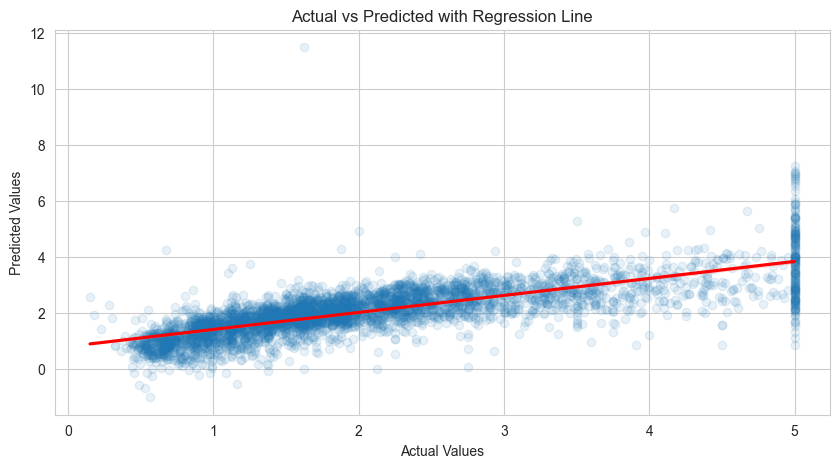

In [28]:
## Begin Example
plt.figure(figsize=(10, 5))

sns.regplot(
    x=y_test, 
    y=y_predict, 
    scatter_kws={'alpha':0.1}, 
    line_kws={'color':'red'}
)

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted with Regression Line")
plt.grid(True)
plt.show()
## End Example

## Conclusion

Congratulations! You've just completed a hands-on exploration of a fundamental
Machine Learning workflow. You've learned how to:

* Understand the basics of ML types and its typical steps.
* Load and explore a real-world dataset.
* Prepare data by splitting it into training and testing sets.
* Train a simple regression model.
* Make predictions with your model.
* Evaluate your model's performance using common metrics.
* Visualize your results to gain insights.

This is truly just the beginning of your journey into Machine Learning.

### How Can We Improve This Model?

<center><img src="../images/stock/pexels-pavel-danilyuk-8439001.jpg"></center>

Now that you've seen a basic model in action, the next exciting step is to think about **how we could make it even better**. Consider these questions and discuss them with your classmates:

1.  **Could we get more data?** Often, having more diverse and relevant data can help a model learn better patterns and make more accurate predictions, especially if your current dataset is small or doesn't cover all scenarios.
2.  **Could we use a different type of model?** Linear Regression assumes a straight-line relationship. What if the relationship between features and house prices isn't a straight line? (Hint: In `sklearn`, explore `ensemble` models like Decision Trees or Random Forests, or even `neural_network` models).
3.  **Are all the features equally important?** Should we try to use all the features, or could some be combined or transformed? (Hint: Sometimes creating new features from existing ones – this is called "feature engineering" – or selecting only the most impactful ones can improve results).
4.  **Does the "scale" of our data matter?** Some features like 'population' are very large numbers, while others like 'average rooms' are small. Could this difference in scale affect how the model learns? (Hint: Look into 'feature scaling' or 'normalization' techniques in `sklearn.preprocessing`).
5.  **How could we be more sure our model isn't just "memorizing" the training data?** Our model works okay on the test set, but what if it just got "lucky" on this particular split? How can we make our evaluation more robust? (Hint: Research 'cross-validation' techniques).

These are just a few ideas to get you thinking about the exciting next steps in improving machine learning models.

### Where to Learn More

Official Documentation Resources:
* Seaborn (Statistical Data Visualization):

__Main Documentation:__ [https://seaborn.pydata.org/](https://seaborn.pydata.org/)

This site offers complete API references, detailed tutorials, and an extensive gallery of examples with accompanying code.

* Scikit-learn (Machine Learning in Python):

__Main Documentation:__ [https://scikit-learn.org/stable/](https://scikit-learn.org/stable/)

Here you'll find thorough explanations of all algorithms, preprocessing methods, model selection techniques, and evaluation metrics. It includes a user guide and an examples gallery to help you understand implementation and application.